In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import h3
import pandas as pd
import geopandas as gpd
import numpy as np
from src.settings import *
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from src.tools.osmnx_utils import get_place_dir_name
from src.tools.h3_utils import get_resolution_buffered_suffix
from pathlib import Path
import plotly.express as px
import matplotlib.pyplot as plt
import contextily as ctx
from keplergl import KeplerGl
from src.tools.feature_extraction import FEATURESET

In [ ]:
tqdm.pandas()

In [ ]:
place_name = "Wrocław,Poland"
place_dir_name = get_place_dir_name(place_name)
resolution = 9
buffered = True

edges_hex = gpd.read_file(GENERATED_DATA_DIR.joinpath(place_dir_name, f"edges_drive_{get_resolution_buffered_suffix(resolution, buffered)}.geojson"), driver="GeoJSON")
hexagons = gpd.read_file(GENERATED_DATA_DIR.joinpath(place_dir_name, f"hex_{get_resolution_buffered_suffix(resolution, buffered)}.geojson"), driver="GeoJSON").set_index("h3_id")
edges_shp = gpd.read_file(GENERATED_DATA_DIR.joinpath(place_dir_name, "shp_drive", f"edges_hex_{get_resolution_buffered_suffix(resolution, buffered)}.shp")).set_index("h3_id")
edges = edges_hex.groupby("id").first().drop(columns="h3_id").reset_index()

In [ ]:
edges

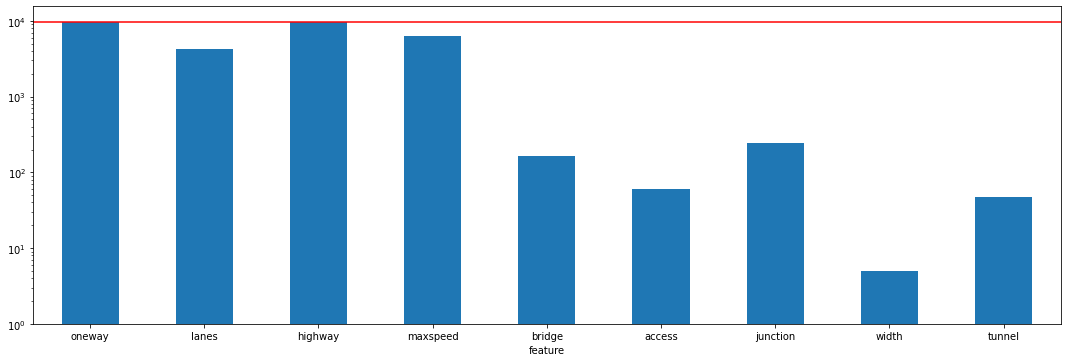

In [91]:
fig, ax = plt.subplots(figsize=(15, 5))
counts = []
plt.tight_layout()
for i, feature in enumerate(FEATURESET.keys()):
    columns = [x for x in edges.columns if feature in x]
    counts.append(edges[columns].sum().sum())
df_to_plot = pd.DataFrame(data={"feature": list(FEATURESET.keys()), "count": counts }).set_index("feature")
df_to_plot.plot(kind="bar", ax=ax, title="", rot=0, log=True, legend=False)
ax.axes.axhline(len(edges.index), color="red")
plt.show()

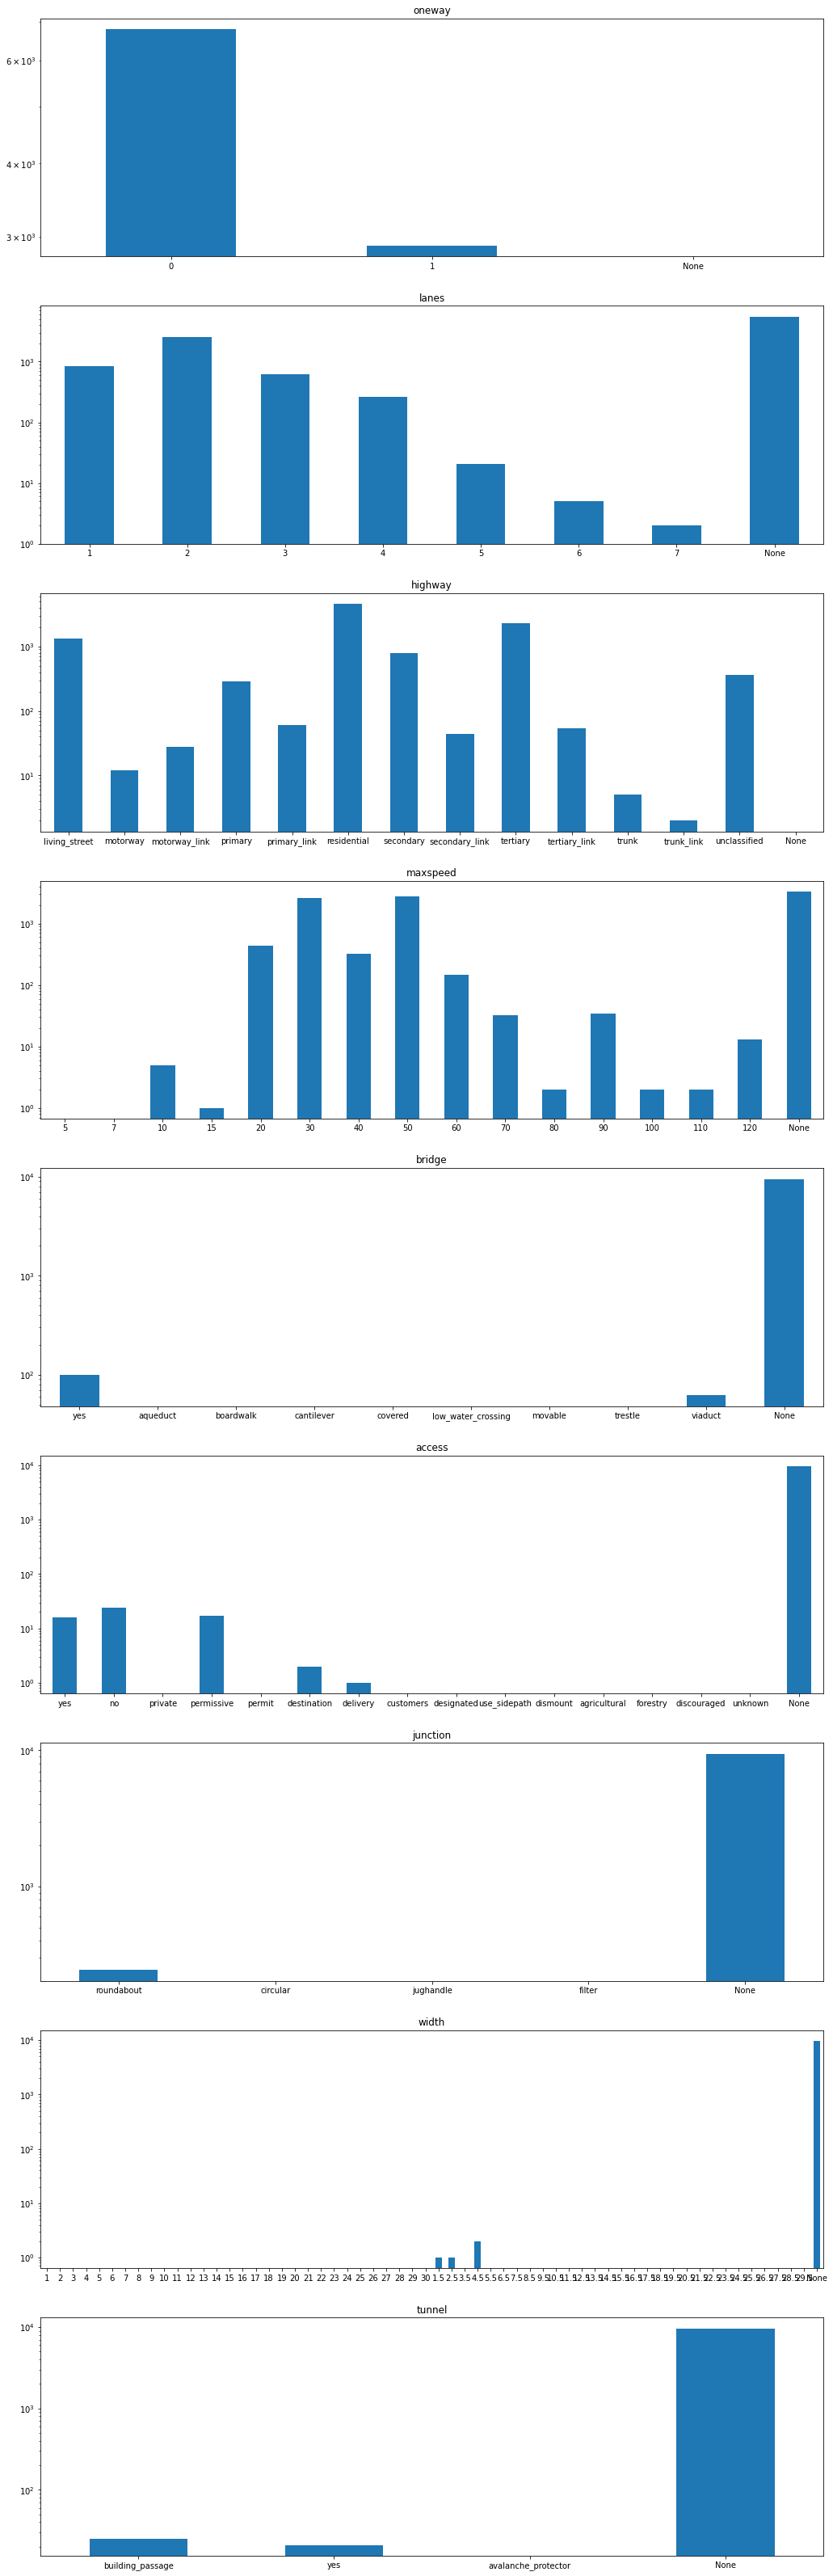

In [86]:
n = len(FEATURESET)

fig, axs = plt.subplots(n, figsize=(15, 5 * n))
plt.tight_layout(pad=4)
for i, feature in enumerate(FEATURESET.keys()):
    columns = [x for x in edges.columns if feature in x]
    df_to_plot = edges[columns].rename(columns={column: "_".join(column.split("_")[1:]) for column in columns}).sum()
    df_to_plot["None"] = len(edges.index) - df_to_plot.sum()
    df_to_plot.plot(kind="bar", ax=axs[i], title=feature, rot=0, log=True)
plt.show()